In [1]:
#importing all necessary modules 
import numpy as np
import pandas as pd #used for data manipulation
import matplotlib.pyplot as plt #used for data visualization
import seaborn as sns #used for data visualization
%matplotlib inline
import datetime as dt 
from sklearn.cluster import DBSCAN #used for machine learning 

c:\python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\python\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#reading the json file and adding it as the DataFrame 
df = pd.read_json("data.json")

In [3]:
#printing necessary information about the DataFrame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         101 non-null    object        
 1   timestamp  101 non-null    datetime64[ns]
 2   latitude   101 non-null    float64       
 3   longitude  101 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 3.3+ KB


In [4]:
#returning the necessary indices/description of the DataFrame 
df.describe()

,latitude,longitude
count,101.000000,101.000000
mean,13.134850,77.638778
std,0.069257,0.046124
min,13.010284,77.553381
25%,13.082686,77.595691
50%,13.133998,77.644826
75%,13.194985,77.681341
max,13.249645,77.705454


In [5]:
#returning the first 5 rows from the DataFrame
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Frankie,2020-07-04 14:35:30,13.148953,77.593650
4,Carol,2020-07-04 21:35:30,13.163716,77.562842


In [6]:
#printing all of the possible/unique names from the id column  
df['id'].unique()

array(['David', 'Frank', 'Frankie', 'Carol', 'Ivan', 'Erin', 'Bob',
       'Grace', 'Alice', 'Judy', 'Heidi'], dtype=object)

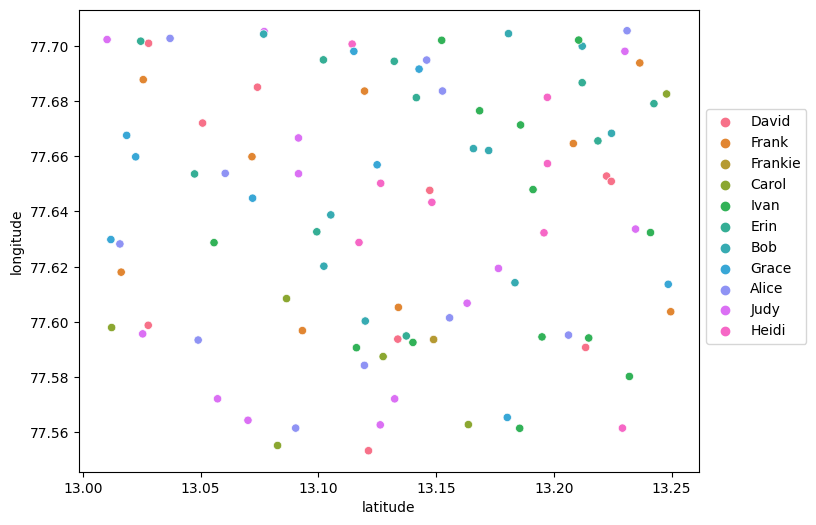

In [7]:
#displaying the seaborn scatterplot by showing the ids(names) with their respective latitudes and longitude values
#across the x and y axis 
plt.figure(figsize=(8,6))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor= [1, 0.8]) 

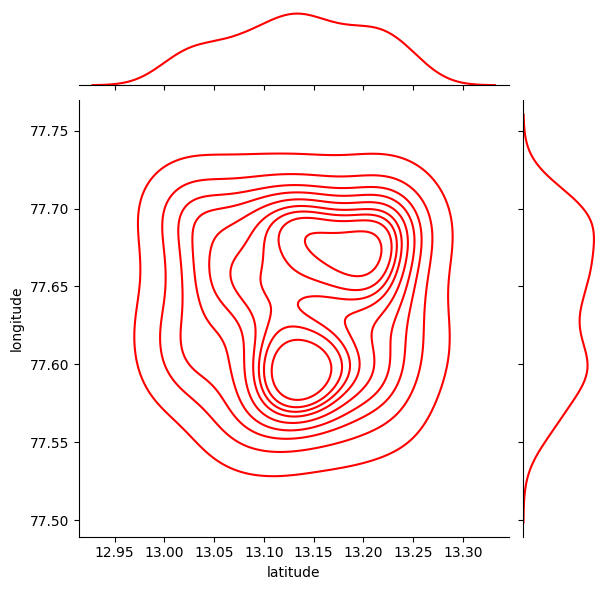

In [8]:
#same dataset but instead of a scatterplot, it is analyzed with a jointplot 
sns.jointplot(x='latitude', y='longitude', data=df, color='red', kind='kde')

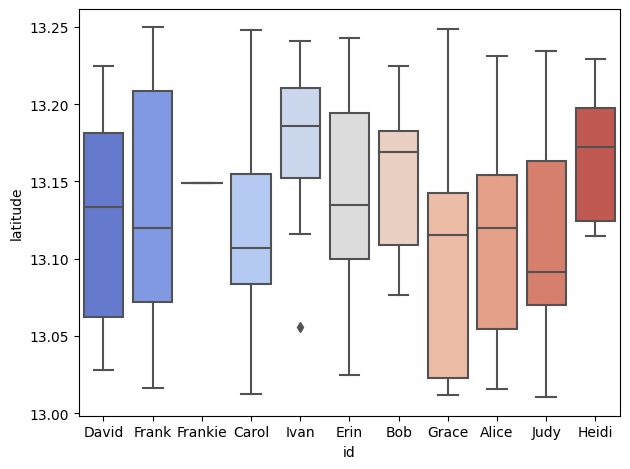

In [9]:
#visualizing the data in boxplots with id (x-axis) and latitude (y-axis)
sns.boxplot(x= 'id', y= 'latitude', data = df, palette = 'coolwarm')
plt.tight_layout()

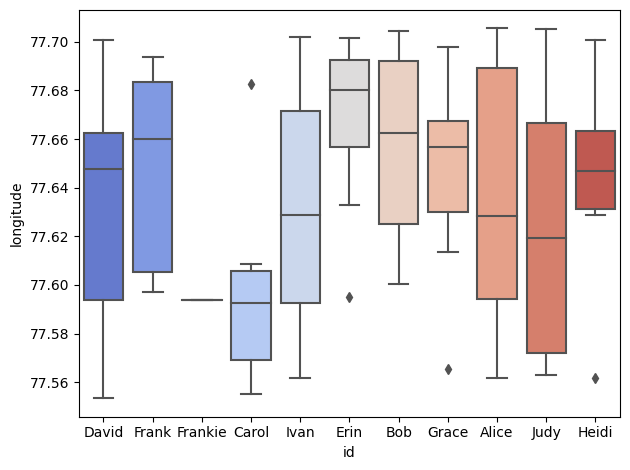

In [10]:
#visualizing the data in boxplots with id (x-axis) and longitude (y-axis)
sns.boxplot(x='id', y='longitude', data=df, palette='coolwarm')
plt.tight_layout()

In [11]:
#creating the clustering model, and identifying the infections by filtering through the data in the clusters,  
#defining the model using the DBSCAN algorithm.
epsilon = 0.0018288 #distance of 6ft in km 
model = DBSCAN(eps = epsilon, min_samples = 2, metric = "haversine").fit(df[['latitude', 'longitude']])
df['cluster'] = model.labels_.tolist()

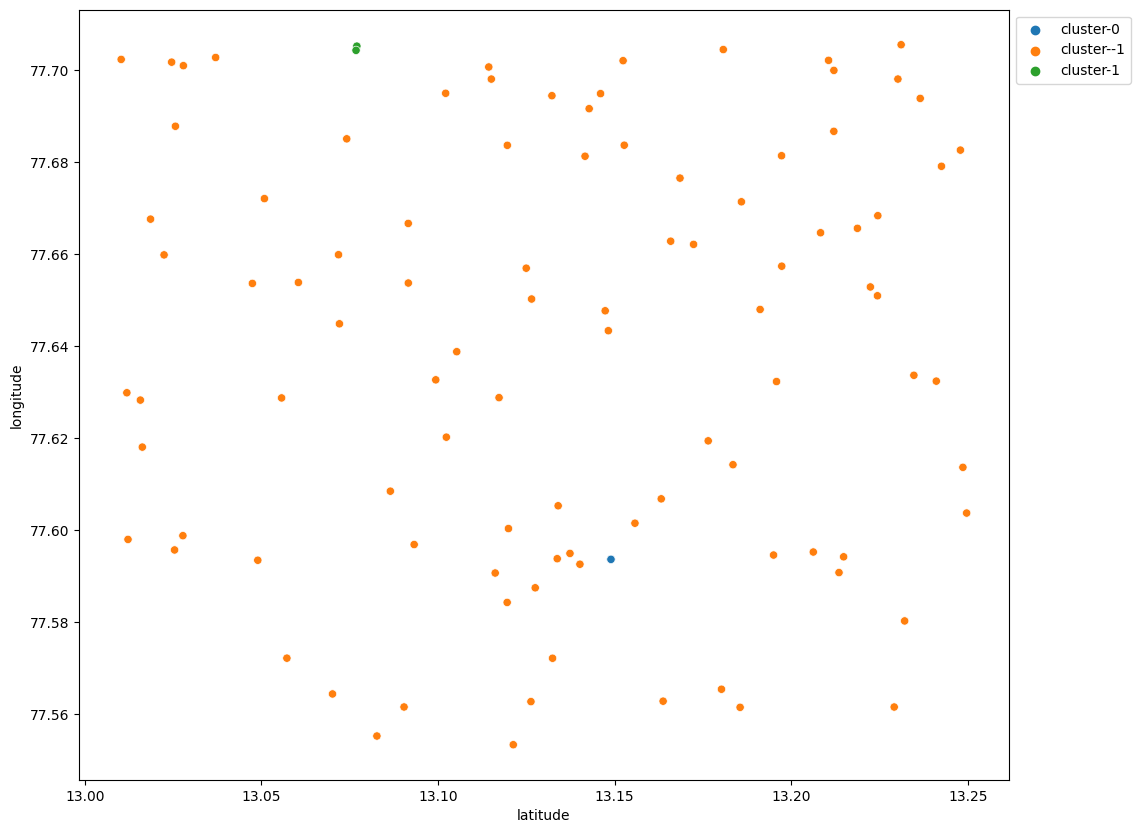

In [12]:
#generating the seaborn scatterplot with neighboring nodes and potential infected people.
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data = df, x='latitude', y='longitude', hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])

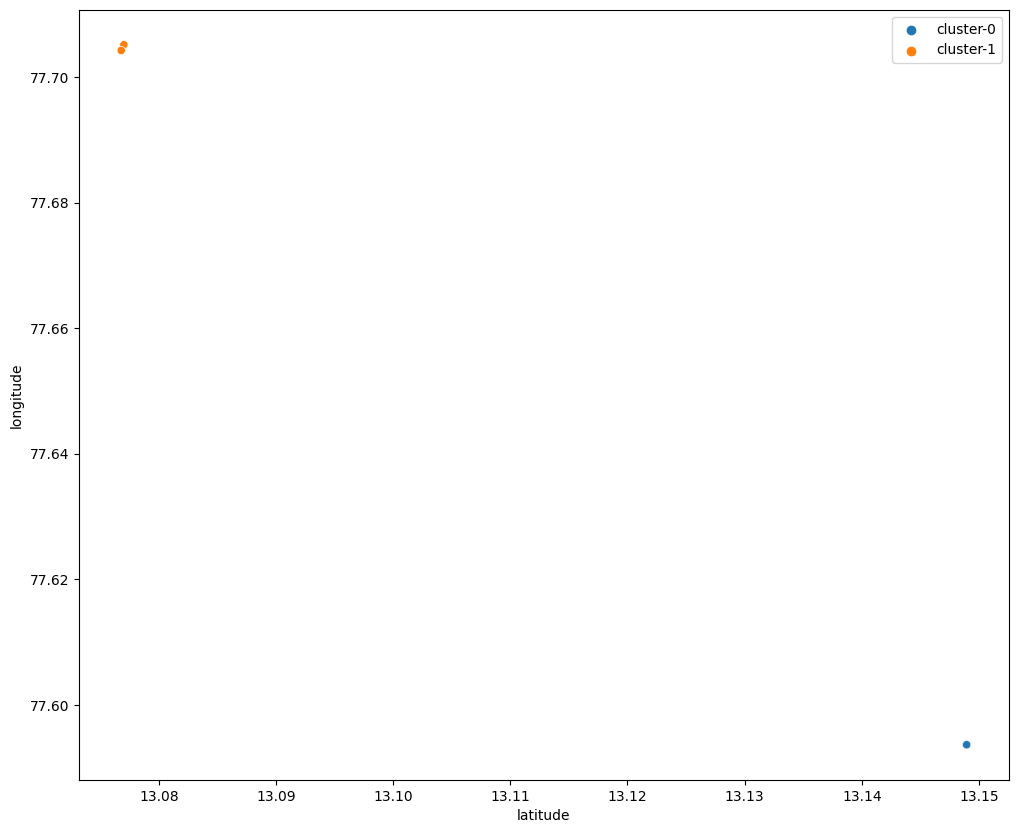

In [13]:
#Plotting the same plot without noise which is cluster--1.
ids = df[(df['cluster'] == -1)].index 
df.drop(ids, inplace = True)
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data=df, x='latitude', y='longitude', hue = ['cluster-{}'.format(x) for x in df['cluster']])
plt.legend(bbox_to_anchor = [1, 1])

In [16]:
#This is testing the actual model. To check for the people who might be potentially infected from the patient, 
#call the function get_infected_names and input a name from the dataset as a parameter to check for neighbouring nodes. 
def get_infected_names(input_name):
    df = pd.read_json("data.json")
    epsilon - 0.0018288 #6ft in km
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()
    
    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass 
            else:
                input_name_clusters.append(df['cluster'][i])
                
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names

In [23]:
#will return the infected name back based on the inputed id 
get_infected_names('Erin')

[]

In [18]:
get_infected_names('David')

['Frankie']

In [20]:
get_infected_names('Bob')

['Judy']